<a href="https://colab.research.google.com/github/bappy15010/Brain-Tumor-Detection/blob/master/Final_Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
image_size = [256,256]
data_path = '/content/drive/My Drive/Harvard Medical Dataset2'

In [ ]:
conv = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

In [ ]:
conv.output

<tf.Tensor 'block5_pool/MaxPool_1:0' shape=(None, 8, 8, 512) dtype=float32>

In [ ]:
for layer in conv.layers:
    layer.trainable = False

In [ ]:
x = conv.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)
x=  Dropout(.2)(x)
pred = Dense(2,activation='softmax')(x)
model = Model(inputs = conv.input,outputs=pred)

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)      

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    validation_split=0.2)

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/Harvard Medical Dataset2', target_size=(256,256), color_mode='rgb', shuffle=False, subset='training', batch_size=10, class_mode='categorical')
val_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Harvard Medical Dataset2', target_size=(256,256), color_mode='rgb', shuffle=False, subset='validation', batch_size=10, class_mode='categorical')

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 122 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
print(train_generator.n)
print(train_generator.batch_size)
print(242//32)

122
10
7


In [ ]:
print(val_generator.n)
print(val_generator.batch_size)

30
10


In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, epochs=40,  verbose=1, validation_data=val_generator)

Epoch 1/40
12/12 [==============================] - 3s 235ms/step - loss: 1.2864 - accuracy: 0.4107 - val_loss: 1.0219 - val_accuracy: 0.4667
Epoch 2/40
12/12 [==============================] - 2s 186ms/step - loss: 0.8877 - accuracy: 0.4911 - val_loss: 0.7036 - val_accuracy: 0.4667
Epoch 3/40
12/12 [==============================] - 2s 184ms/step - loss: 0.7561 - accuracy: 0.4911 - val_loss: 0.6764 - val_accuracy: 0.5333
Epoch 4/40
12/12 [==============================] - 2s 186ms/step - loss: 0.7139 - accuracy: 0.4554 - val_loss: 0.6704 - val_accuracy: 0.8333
Epoch 5/40
12/12 [==============================] - 2s 183ms/step - loss: 0.6773 - accuracy: 0.5536 - val_loss: 0.6199 - val_accuracy: 0.8667
Epoch 6/40
12/12 [==============================] - 2s 189ms/step - loss: 0.6266 - accuracy: 0.7857 - val_loss: 0.5332 - val_accuracy: 0.8333
Epoch 7/40
12/12 [==============================] - 2s 188ms/step - loss: 0.6469 - accuracy: 0.6161 - val_loss: 0.9650 - val_accuracy: 0.4667
Epoch 

In [ ]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN-PreTrained Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,40))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 40, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 40, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_generator, val_generator.n // val_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


In [ ]:
print(val_generator.classes)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

Confusion Matrix
[[16  0]
 [ 0 14]]


In [ ]:
print('Classification Report')
target_names = ['Abnormal', 'Normal']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00        16
      Normal       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(91.68, 0.5, 'True Values')

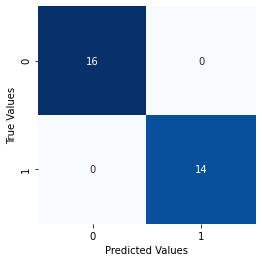

In [ ]:
import seaborn as sns
cm=confusion_matrix(val_generator.classes, y_pred)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

[Text(0, 0.5, 'Abnormal'), Text(0, 1.5, 'Normal')]

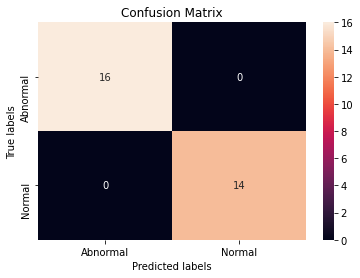

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal'])

Confusion Matrix :
[[16  0]
 [ 0 14]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



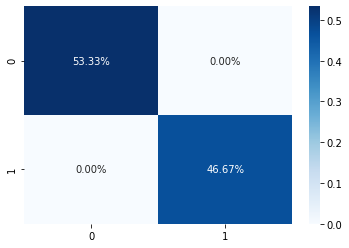

In [ ]:
from sklearn.metrics import accuracy_score
results = confusion_matrix(val_generator.classes,y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(val_generator.classes,y_pred)) 
print('Report : ')
print(classification_report(val_generator.classes,y_pred))

sns.heatmap(results/np.sum(results), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_generator.classes, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

1.0

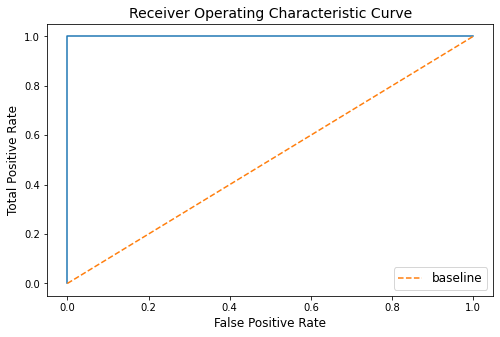

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);

In [ ]:
model.save('/content/drive/My Drive/Harvard Medical Dataset2/my_VGG16finalmodel.h5')

In [ ]:
model.save_weights('/content/drive/My Drive/Harvard Medical Dataset2/my_VGG16finalweight')